In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
import plotly.express as px

In [11]:
test = pd.read_csv('/content/drive/MyDrive/mydata/musicTest.csv')
train=pd.read_csv('/content/drive/MyDrive/mydata/musicData.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  14396 non-null  int64  
 1   Artist Name         14396 non-null  object 
 2   Track Name          14396 non-null  object 
 3   Popularity          14063 non-null  float64
 4   danceability        14396 non-null  float64
 5   energy              14396 non-null  float64
 6   key                 12787 non-null  float64
 7   loudness            14396 non-null  float64
 8   mode                14396 non-null  int64  
 9   speechiness         14396 non-null  float64
 10  acousticness        14396 non-null  float64
 11  instrumentalness    10855 non-null  float64
 12  liveness            14396 non-null  float64
 13  valence             14396 non-null  float64
 14  tempo               14396 non-null  float64
 15  duration_in min/ms  14396 non-null  float64
 16  time

**Feature Descriptions for Music Tracks:** This list details the characteristics of music tracks, covering both musical elements and metadata.

**Artist Name:** The artist's name.

**Track Name:** The song's title.

**Popularity:** A value indicating the song's popularity; higher values mean more popular.

**Danceability:** Measures how suitable a track is for dancing, based on tempo, rhythm, etc.

**Energy:** A 0.0 to 1.0 measure of a track's intensity and activity.

**Key:** The track's musical key, using Pitch Class notation (e.g., 0 = C).

**Loudness:** The track's average loudness in decibels (dB), useful for comparing tracks.

**Mode:** Indicates major (1) or minor (0) scale modality.

**Speechiness:** Measures the presence of spoken words; higher values indicate more speech.

**Acousticness:** A 0.0 to 1.0 measure of the track's acoustic confidence.

**Instrumentalness:** Predicts if a track lacks vocals; higher values suggest no vocal content.

**Liveness:** Indicates live performance likelihood; values above 0.8 suggest a live track.

**Valence:** A 0.0 to 1.0 measure of musical positiveness; higher values sound more positive.

**Tempo:** The track's tempo in beats per minute (BPM).

**Duration:** The song's length in minutes or milliseconds.

**Time Signature:** Specifies the number of beats per measure and the note value equivalent to a beat.

**Class:** The track's genre.

In [12]:
train.drop({'Id','Artist Name','Track Name'},axis=1,inplace=True)
train.fillna(train.mean(),inplace=True)

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14396 entries, 0 to 14395
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Popularity          14396 non-null  float64
 1   danceability        14396 non-null  float64
 2   energy              14396 non-null  float64
 3   key                 14396 non-null  float64
 4   loudness            14396 non-null  float64
 5   mode                14396 non-null  int64  
 6   speechiness         14396 non-null  float64
 7   acousticness        14396 non-null  float64
 8   instrumentalness    14396 non-null  float64
 9   liveness            14396 non-null  float64
 10  valence             14396 non-null  float64
 11  tempo               14396 non-null  float64
 12  duration_in min/ms  14396 non-null  float64
 13  time_signature      14396 non-null  int64  
 14  Class               14396 non-null  int64  
dtypes: float64(12), int64(3)
memory usage: 1.6 MB


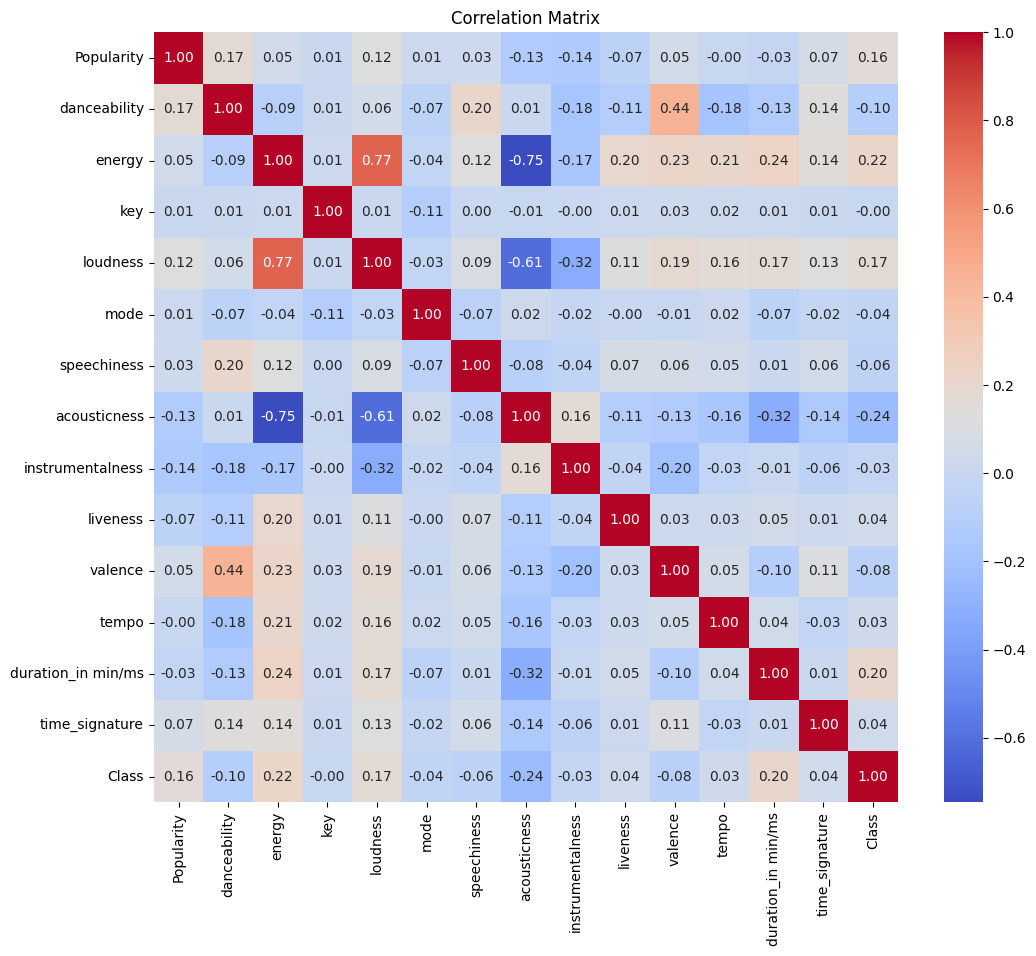

In [ ]:
plt.figure(figsize=(12, 10))
correlation_matrix = train.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

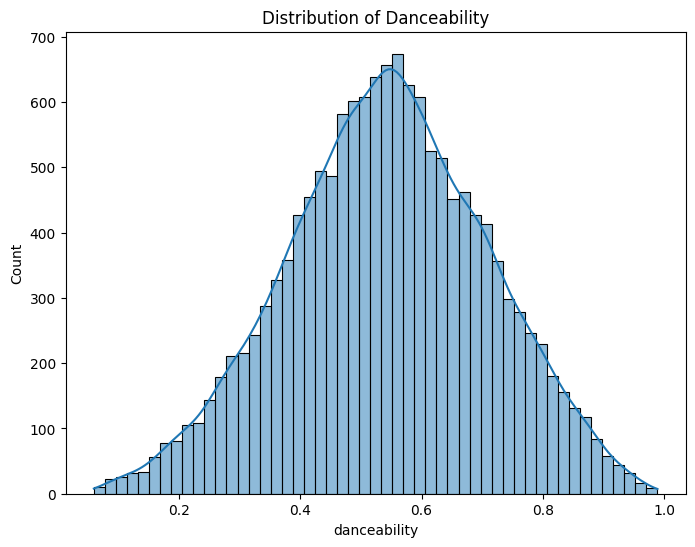

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(train['danceability'], kde=True)
plt.title('Distribution of Danceability')
plt.show()

In [ ]:
train['Class'].value_counts()

,count
Class,
10,3959
6,2069
9,2019
8,1483
5,1157
1,1098
2,1018
0,500
7,461


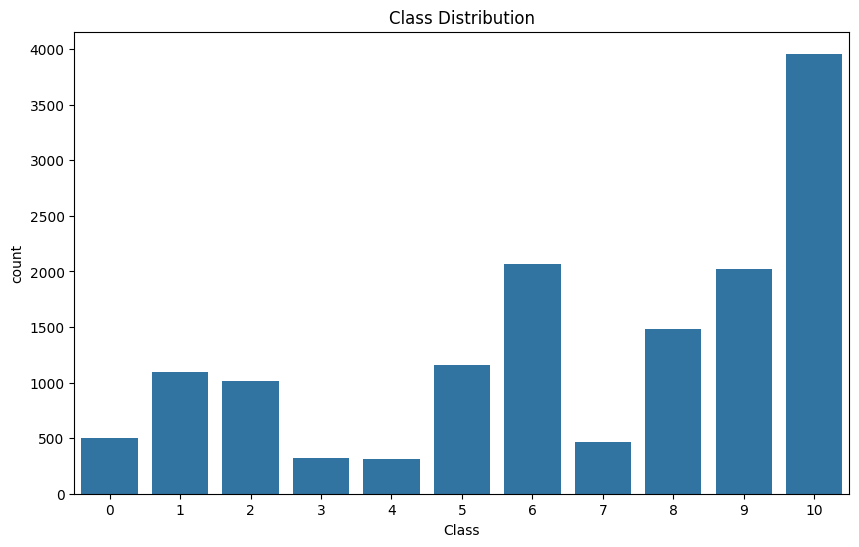

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Class', data=train)
plt.title('Class Distribution')
plt.show()

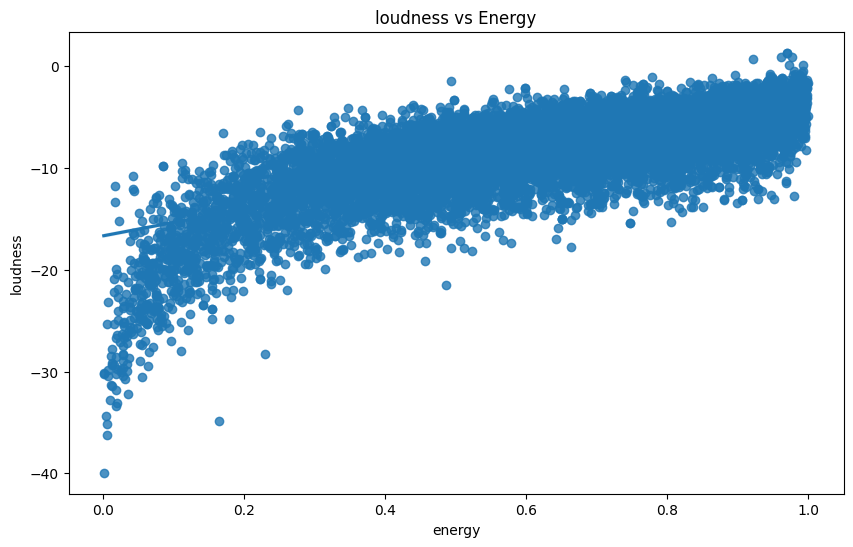

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(data = train, y= "loudness", x = "energy").set(title="loudness vs Energy")
plt.show()

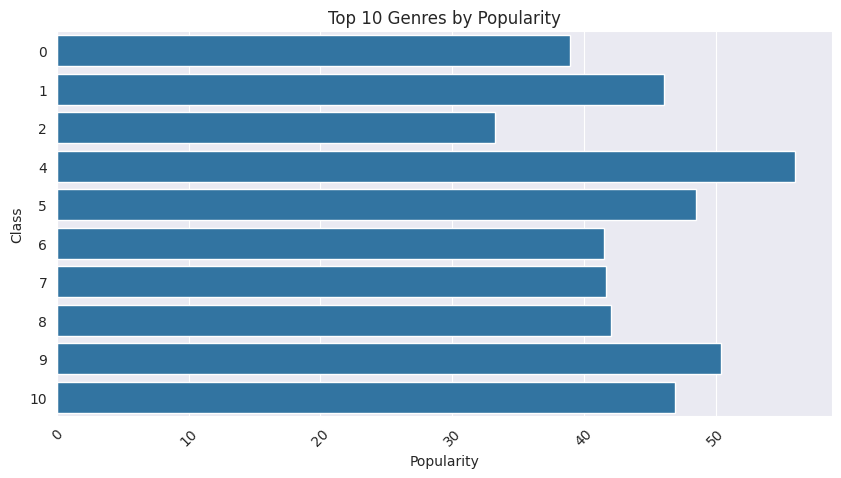

In [19]:
sns.set_style(style="darkgrid")
plt.figure(figsize=(10, 5))
genre_data = train.groupby('Class').mean(numeric_only=True).reset_index()
famous = genre_data.sort_values("Popularity", ascending=False).head(10)
famous = famous.sort_values("Class", ascending=True)
famous['Class'] = famous['Class'].astype(str)
sns.barplot(y="Class", x="Popularity", data=famous).set(title="Top 10 Genres by Popularity")
plt.xticks(rotation=45)
plt.show()

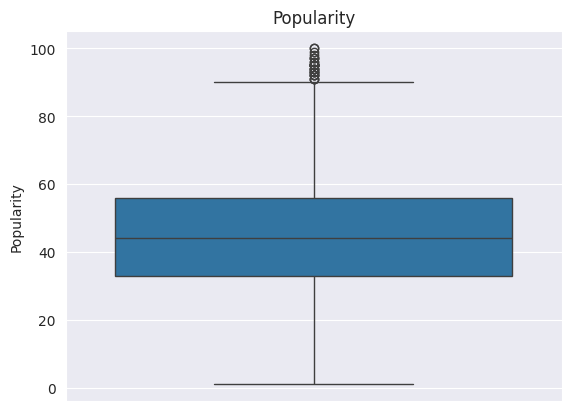

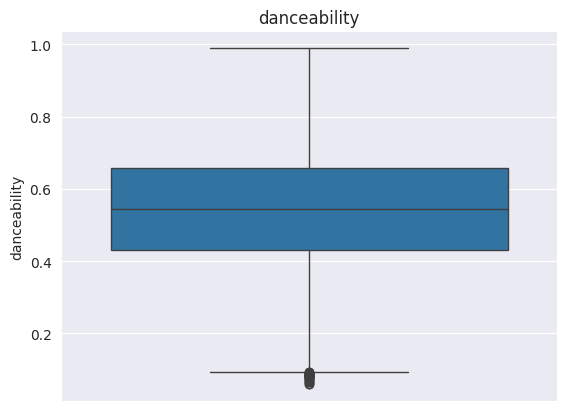

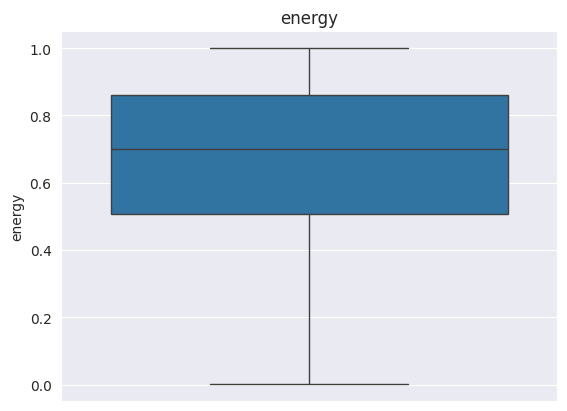

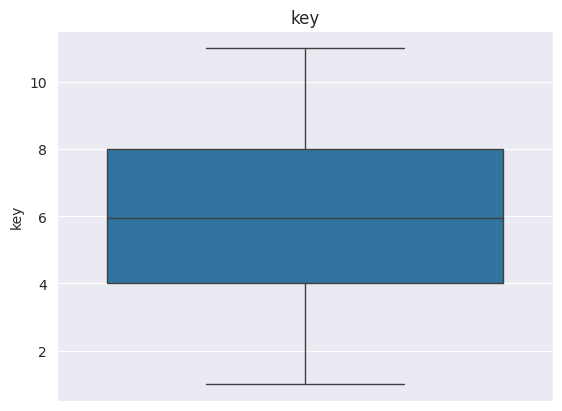

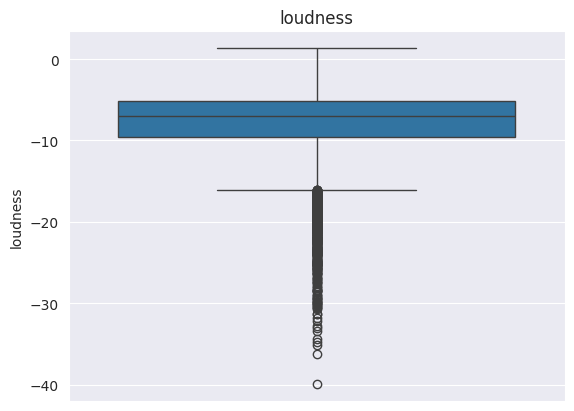

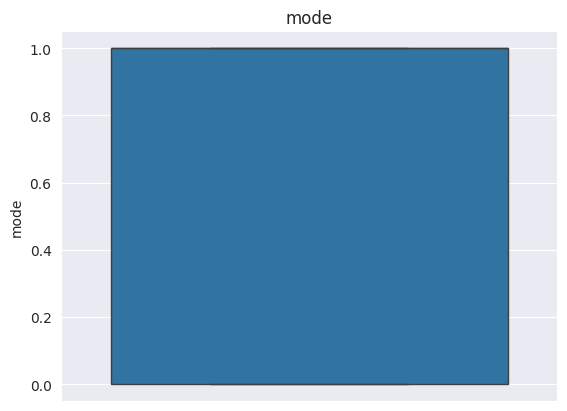

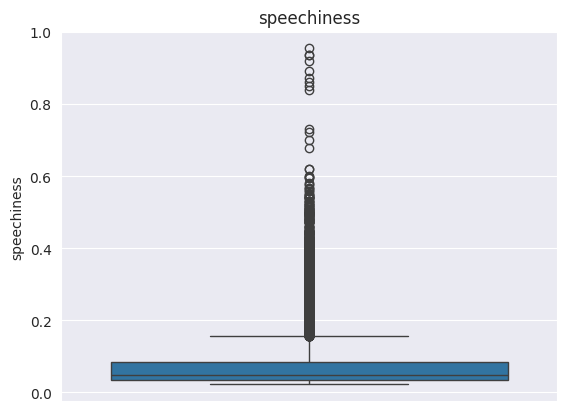

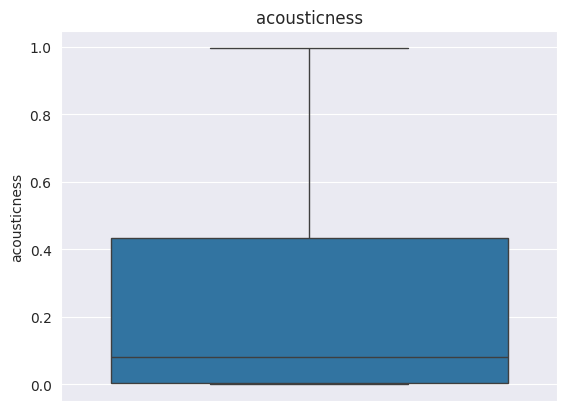

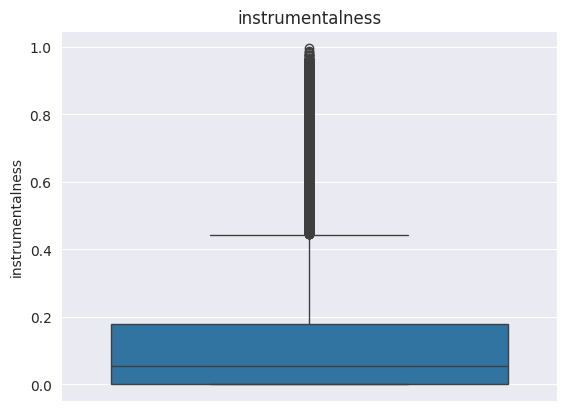

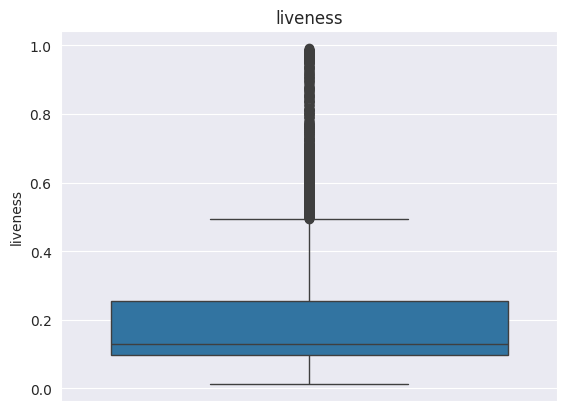

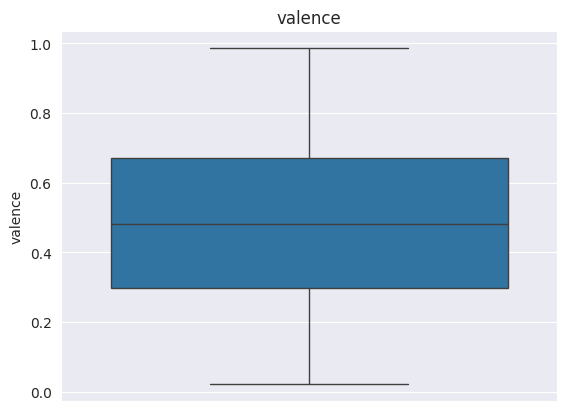

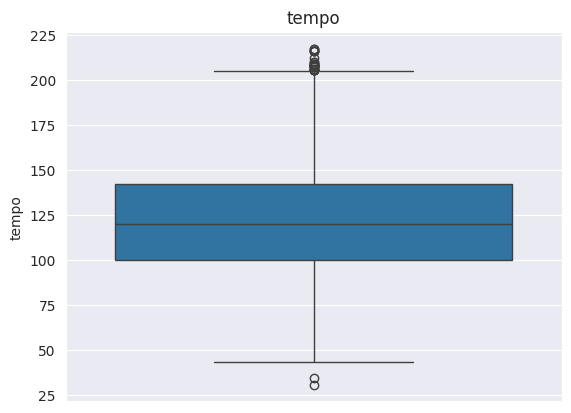

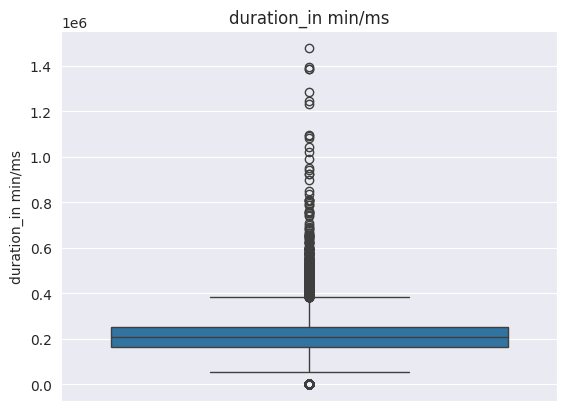

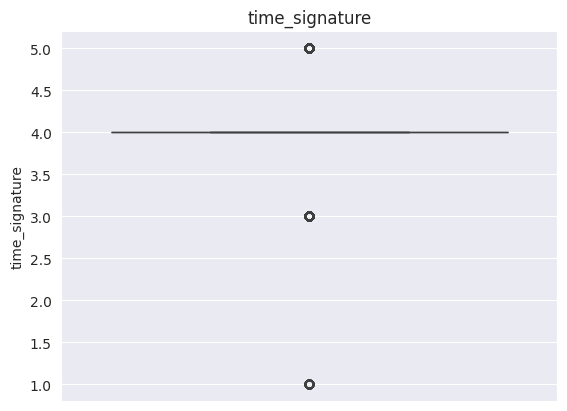

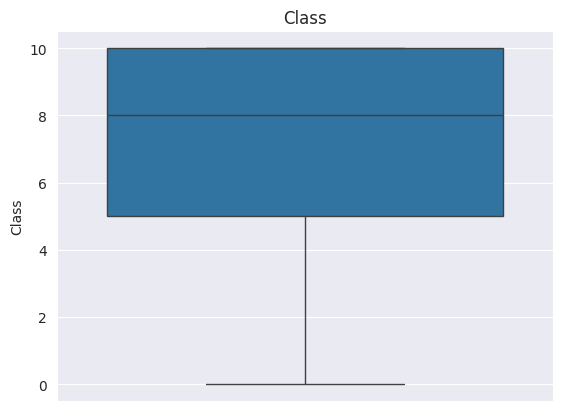

In [26]:
for col in train:
  sns.boxplot(train[col])
  plt.title(col)
  plt.show()

In [ ]:
train['energy_valence_interaction'] = train['energy'] * train['valence']
train['tempo_binned'] = pd.cut(train['tempo'], bins=5, labels=False)

In [ ]:
X = train.drop(columns='Class')
y = train['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,oob_score=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.5013893713094825

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
svc_model = SVC(probability=True, random_state=42)
lr_model = LogisticRegression(random_state=42)

In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svc', svc_model)],
    voting='soft')

voting_clf.fit(X_train, y_train)

voting_pred = voting_clf.predict(X_test)
print("Voting Classifier Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, voting_pred))
print("\nClassification Report:\n", classification_report(y_test, voting_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, voting_pred))

Voting Classifier Results
Confusion Matrix:
 [[ 81   0   0   4  10   0   0   4   0   5   0]
 [  0   2   3   0   0   7  55   0   6  17 114]
 [  0   0  61   0   0   1  18   0   2  23 130]
 [ 15   0   0  47   2   0   0   3   0   1   0]
 [ 11   0   0   0  51   0   0   0   0   4   2]
 [  0   0   0   0   0 153   8   0   0  45  30]
 [  0  37   4   0   0  17 105   0  12  20 208]
 [  5   0   0   1   0   0   0  81   0   0   0]
 [  0   0   0   0   0   0   5   0 131   2 154]
 [  9   5   3   1   5  29  31   1   0 218 104]
 [  3  18  13   0  15   6  56   0  65  44 557]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71       104
           1       0.03      0.01      0.02       204
           2       0.73      0.26      0.38       235
           3       0.89      0.69      0.78        68
           4       0.61      0.75      0.68        68
           5       0.72      0.65      0.68       236
           6       0.38      0.26

In [ ]:
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('svc', svc_model),
    ('lr',lr_model)],
    final_estimator=lr_model,
    cv=5)


stacking_clf.fit(X_train, y_train)


stacking_pred = stacking_clf.predict(X_test)
print("Stacking Classifier Results")
print("Confusion Matrix:\n", confusion_matrix(y_test, stacking_pred))
print("\nClassification Report:\n", classification_report(y_test, stacking_pred))
print("\nAccuracy Score:\n", accuracy_score(y_test, stacking_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Stacking Classifier Results
Confusion Matrix:
 [[ 85   0   0   5   8   0   0   2   0   4   0]
 [  0  39   4   0   0   7  38   0   9  23  84]
 [  0   1  92   0   0   1  23   0   1  24  93]
 [ 13   0   0  49   2   0   0   3   0   1   0]
 [ 12   0   0   0  51   0   0   0   0   2   3]
 [  0   0   1   0   0 153   9   0   0  53  20]
 [  0   2  11   0   0  13 169   0  17  26 165]
 [  3   0   0   3   0   0   0  81   0   0   0]
 [  0   1   1   0   0   0   4   0 165   3 118]
 [ 11   9   9   1   6  27  32   0   0 227  84]
 [  4  20  40   0  12   6  68   0  65  54 508]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73       104
           1       0.54      0.19      0.28       204
           2       0.58      0.39      0.47       235
           3       0.84      0.72      0.78        68
           4       0.65      0.75      0.69        68
           5       0.74      0.65      0.69       236
           6       0.49      0.

In [27]:
ID=test['Id']
test.drop({'Id','Artist Name','Track Name'},axis=1,inplace=True)
test.fillna(test.mean(),inplace=True)

In [ ]:
test['energy_valence_interaction'] = test['energy'] * test['valence']
test['tempo_binned'] = pd.cut(test['tempo'], bins=5, labels=False)

In [ ]:
predictions = stacking_clf.predict(test)
submission = pd.DataFrame({'Id': ID, 'Class': predictions})
submission.to_csv('sub.csv', index=False)